This is a good ( **99% correct**) prediction for so-so.csv Data (5 input and 1 output). this page made from this Colab Page:

> Indented block



https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-rnn-full-predict.ipynb#scrollTo=WJJcT-mZh915


In [1]:

# import os,sys

# sys.path.insert(0,'/content/')
# if not os.path.exists("/root/.ipython/ocr.py"):
#     from subprocess import run
#     from shlex import split

#     shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/OneClickRun/master/res/ocr.py \
#                     -O /content/ocr.py"
#     run(split(shellCmd))
# from ocr import runSh

# def runShT(args):
#     return runSh(args, output=True)
# runShT('bash simple_shell_script.sh')

In [2]:
# %%writefile simple_shell_script2.sh
# Current_dir=$PWD
# echo "current dir is ${Current_dir}"
# # from google.colab import drive
# # drive.mount('/content/gdrive')
# # !cp '/content/gdrive/MyDrive/Amir Farzin Project/so-so.csv' /content/stock-prediction
# # !wget https://transfer.sh/o5273/so-so.csv
# echo "cd ${Current_dir}"
# cd ${Current_dir}//stock-prediction

# git clone https://github.com/So-AI-love/Test_NN
# unzip -o  "${Current_dir}/Test_NN/so-so.zip" -d "${Current_dir}/Test_NN"
# cp "${Current_dir}/Test_NN/so-so.csv" "${Current_dir}/"

In [3]:
!pwd 

/content


In [4]:
# runShT('bash simple_shell_script2.sh')

In [5]:
!pip install google-colab

In [6]:
from google.colab import files , drive
# files.upload()
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
import pandas as pd
# data_dir = "https://dlsun.github.io/pods/data/"
# df_ames = pd.read_csv(data_dir + "AmesHousing.txt", sep="\t")
# df_ames.head()

In [9]:

# df = pd.read_csv('so-so.csv')
# df=pd.read_csv('/home/so/Downloads/Telegram Desktop/Data_08_2020_input.csv')
# df2=pd.read_csv('/home/so/Downloads/Telegram Desktop/Data_08_2020_output - S.csv')

df=pd.read_csv('/content/gdrive/MyDrive/Amir Farzin Secure Data/Data_08_2020_input.csv')
df2=pd.read_csv('/content/gdrive/MyDrive/Amir Farzin Secure Data/Data_08_2020_output - S.csv')

df.head()
df2.head()


,Time,CO2
0,17-08-20 0:00,291.252600
1,17-08-20 0:01,291.656027
2,17-08-20 0:02,288.467146
3,17-08-20 0:03,282.867887
4,17-08-20 0:04,283.057879


In [10]:
df.head()


,Time,FIC_1321_SP,FIC_1321_PV,FIC_1321_OUT,RIC_1311_SP,RIC_1311_PV,RIC_1311_OUT,RIC_1320_SP,RIC_1320_PV,RIC_1320_OUT,TIC_1150_SP,TIC_1150_PV,TIC_1150_OUT,TIC_1250_SP,TIC_1250_PV,TIC_1250_OUT,PDIC_1413_SP,PDIC_1413_PV,PDIC_1413_OUT,FIC_204_SP,FIC_204_PV,FIC_204_OUT,FIC_205_SP,FIC_205_PV,FIC_205_OUT,FIC_602_SP,FIC_602_PV,FIC_602_OUT,FIC_1360_SP,FIC_1360_PV,FIC_1360_OUT,PIC_329_SP,PIC_329_PV,PIC_329_OUT,FIC_202_SP,FIC_202_PV,FIC_202_OUT,FIC_203_SP,FIC_203_PV,FIC_203_OUT,TI_3733-1_PV,TI_3130_PV,TY_1329_PV,TY_1331_PV,AI_151_PV,TI_252-1_PV
0,17-Aug-20 00:00:00,60.519039,60.491921,57.805900,3.317911,3.317911,21150.0,3.345023,3.345108,37228.85942,760.799988,761.044315,1.812243,760.200012,760.329042,1.795578,1.087846,1.087846,22.0,410.0,408.058692,69.331706,410.0,412.411950,65.635773,6000.0,5989.442423,11.809569,3554.202036,3554.202036,74.0,26.0,25.992372,92.594480,81.0,80.833493,33.525105,81.0,80.807097,35.470481,29.864918,18.835617,1101.628345,948.276040,0.377546,178.434269
1,17-Aug-20 00:01:00,60.519039,60.573661,57.791111,3.317911,3.317911,21150.0,3.341907,3.342012,37228.29533,760.799988,761.042964,1.812041,760.200012,760.323124,1.795520,1.087690,1.087690,22.0,410.0,408.532078,69.470408,410.0,412.140233,65.640992,6000.0,5990.331913,11.819274,3552.880731,3552.880731,74.0,26.0,25.999317,93.633696,81.0,80.913462,33.588194,81.0,80.536010,35.563675,29.863531,18.806534,1101.652565,948.227688,0.377306,178.422690
2,17-Aug-20 00:02:00,60.519039,60.525547,57.817259,3.317911,3.317911,21150.0,3.343107,3.343039,37243.92034,760.799988,761.041421,1.812067,760.200012,760.349170,1.795539,1.087369,1.087369,22.0,410.0,408.159187,69.575323,410.0,410.562369,65.731597,6000.0,5984.962090,11.842718,3545.332073,3545.332073,74.0,26.0,26.003898,93.751042,81.0,81.052741,33.730155,81.0,80.592873,35.613573,29.862143,18.804466,1101.737909,948.318011,0.377958,178.378130
3,17-Aug-20 00:03:00,60.519039,60.503820,57.830657,3.317911,3.317911,21150.0,3.342583,3.342583,37235.57606,760.799988,761.042077,1.812122,760.200012,760.366613,1.795609,1.085633,1.085633,22.0,410.0,408.659043,69.568745,410.0,410.050967,65.744806,6000.0,5986.416733,11.854616,3542.121978,3542.121978,74.0,26.0,25.999462,93.342203,81.0,80.893861,33.772829,81.0,81.011394,35.753719,29.860755,18.823079,1101.876815,948.502915,0.379097,178.333710
4,17-Aug-20 00:04:00,60.519039,60.520480,57.830769,3.317911,3.317911,21150.0,3.343532,3.343532,37234.87327,760.799988,761.036160,1.812037,760.200012,760.378198,1.795501,1.089943,1.089943,22.0,410.0,409.931374,69.595012,410.0,410.200509,65.740786,6000.0,5988.303974,11.866623,3536.746794,3536.746794,74.0,26.0,26.002769,91.878288,81.0,80.669406,33.801514,81.0,80.989015,35.764862,29.859368,18.810354,1101.977778,948.567782,0.379366,178.387372


In [11]:
print(df.shape);print(df2.shape)

(15840, 46)
(15840, 2)


In [12]:
import re, regex
ddd=df['Time'].str
# df['day_of_week']= ddd.split('.').str[-1]
# df['time']= ddd.split('.').str[0]
# df['day_of_week']=pd.to_datetime(df['day_of_week'], format='%H:%M', errors='ignore') #
# df=df[['Time','day_of_week','-1-','-2-','-3-','-4-','-5-','out']]
# df=df[['-1-','-2-','-3-','-4-','-5-','out']]
df['CO2']= df2['CO2']
df.head()

,Time,FIC_1321_SP,FIC_1321_PV,FIC_1321_OUT,RIC_1311_SP,RIC_1311_PV,RIC_1311_OUT,RIC_1320_SP,RIC_1320_PV,RIC_1320_OUT,TIC_1150_SP,TIC_1150_PV,TIC_1150_OUT,TIC_1250_SP,TIC_1250_PV,TIC_1250_OUT,PDIC_1413_SP,PDIC_1413_PV,PDIC_1413_OUT,FIC_204_SP,FIC_204_PV,FIC_204_OUT,FIC_205_SP,FIC_205_PV,FIC_205_OUT,FIC_602_SP,FIC_602_PV,FIC_602_OUT,FIC_1360_SP,FIC_1360_PV,FIC_1360_OUT,PIC_329_SP,PIC_329_PV,PIC_329_OUT,FIC_202_SP,FIC_202_PV,FIC_202_OUT,FIC_203_SP,FIC_203_PV,FIC_203_OUT,TI_3733-1_PV,TI_3130_PV,TY_1329_PV,TY_1331_PV,AI_151_PV,TI_252-1_PV,CO2
0,17-Aug-20 00:00:00,60.519039,60.491921,57.805900,3.317911,3.317911,21150.0,3.345023,3.345108,37228.85942,760.799988,761.044315,1.812243,760.200012,760.329042,1.795578,1.087846,1.087846,22.0,410.0,408.058692,69.331706,410.0,412.411950,65.635773,6000.0,5989.442423,11.809569,3554.202036,3554.202036,74.0,26.0,25.992372,92.594480,81.0,80.833493,33.525105,81.0,80.807097,35.470481,29.864918,18.835617,1101.628345,948.276040,0.377546,178.434269,291.252600
1,17-Aug-20 00:01:00,60.519039,60.573661,57.791111,3.317911,3.317911,21150.0,3.341907,3.342012,37228.29533,760.799988,761.042964,1.812041,760.200012,760.323124,1.795520,1.087690,1.087690,22.0,410.0,408.532078,69.470408,410.0,412.140233,65.640992,6000.0,5990.331913,11.819274,3552.880731,3552.880731,74.0,26.0,25.999317,93.633696,81.0,80.913462,33.588194,81.0,80.536010,35.563675,29.863531,18.806534,1101.652565,948.227688,0.377306,178.422690,291.656027
2,17-Aug-20 00:02:00,60.519039,60.525547,57.817259,3.317911,3.317911,21150.0,3.343107,3.343039,37243.92034,760.799988,761.041421,1.812067,760.200012,760.349170,1.795539,1.087369,1.087369,22.0,410.0,408.159187,69.575323,410.0,410.562369,65.731597,6000.0,5984.962090,11.842718,3545.332073,3545.332073,74.0,26.0,26.003898,93.751042,81.0,81.052741,33.730155,81.0,80.592873,35.613573,29.862143,18.804466,1101.737909,948.318011,0.377958,178.378130,288.467146
3,17-Aug-20 00:03:00,60.519039,60.503820,57.830657,3.317911,3.317911,21150.0,3.342583,3.342583,37235.57606,760.799988,761.042077,1.812122,760.200012,760.366613,1.795609,1.085633,1.085633,22.0,410.0,408.659043,69.568745,410.0,410.050967,65.744806,6000.0,5986.416733,11.854616,3542.121978,3542.121978,74.0,26.0,25.999462,93.342203,81.0,80.893861,33.772829,81.0,81.011394,35.753719,29.860755,18.823079,1101.876815,948.502915,0.379097,178.333710,282.867887
4,17-Aug-20 00:04:00,60.519039,60.520480,57.830769,3.317911,3.317911,21150.0,3.343532,3.343532,37234.87327,760.799988,761.036160,1.812037,760.200012,760.378198,1.795501,1.089943,1.089943,22.0,410.0,409.931374,69.595012,410.0,410.200509,65.740786,6000.0,5988.303974,11.866623,3536.746794,3536.746794,74.0,26.0,26.002769,91.878288,81.0,80.669406,33.801514,81.0,80.989015,35.764862,29.859368,18.810354,1101.977778,948.567782,0.379366,178.387372,283.057879


# Forecasting Time Series data

* Idea and some code taken from, and also OPSD time series data set explained here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* Some code and approaches from: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
* Nice tutorial: https://www.tensorflow.org/beta/tutorials/text/time_series

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
# plt.xkcd()
# plt.style.use('ggplot')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)

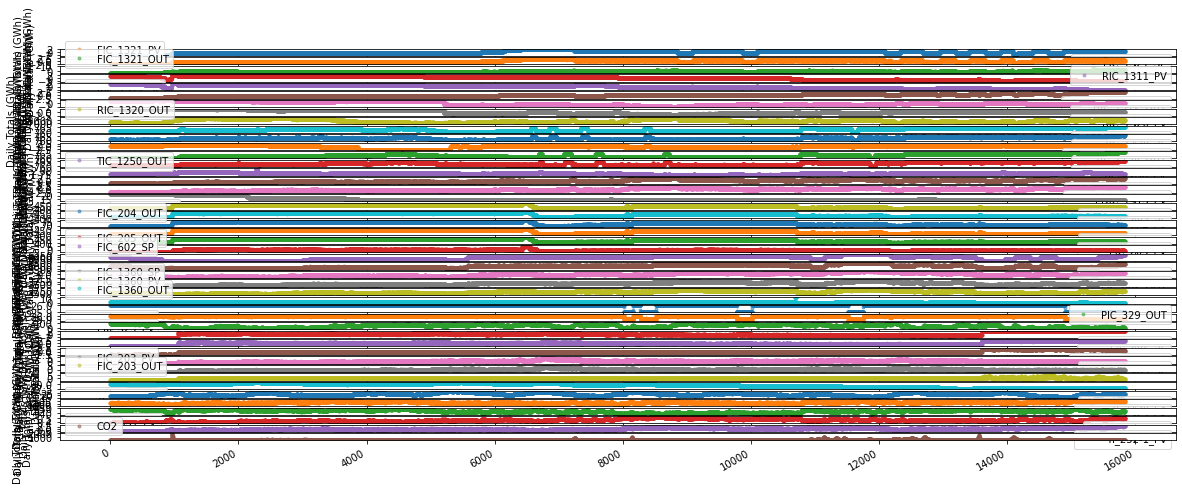

In [60]:
cols_plot = df.columns #['-1-', '-2-', 'out']

axes = data_combine[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [66]:
import pandas as pd
import numpy as np

In [67]:
# for local
# url = 'opsd_germany_daily.csv'

# for colab
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

# time_series_df = pd.read_csv(url, 
#                              sep=',', 
#                              index_col=0, # you can use the date as the index for pandas
#                              parse_dates=[0]) # where is the time stamp?

time_series_df=df;


In [68]:
time_series_df.head()

,Time,FIC_1321_SP,FIC_1321_PV,FIC_1321_OUT,RIC_1311_SP,RIC_1311_PV,RIC_1311_OUT,RIC_1320_SP,RIC_1320_PV,RIC_1320_OUT,TIC_1150_SP,TIC_1150_PV,TIC_1150_OUT,TIC_1250_SP,TIC_1250_PV,TIC_1250_OUT,PDIC_1413_SP,PDIC_1413_PV,PDIC_1413_OUT,FIC_204_SP,FIC_204_PV,FIC_204_OUT,FIC_205_SP,FIC_205_PV,FIC_205_OUT,FIC_602_SP,FIC_602_PV,FIC_602_OUT,FIC_1360_SP,FIC_1360_PV,FIC_1360_OUT,PIC_329_SP,PIC_329_PV,PIC_329_OUT,FIC_202_SP,FIC_202_PV,FIC_202_OUT,FIC_203_SP,FIC_203_PV,FIC_203_OUT,TI_3733-1_PV,TI_3130_PV,TY_1329_PV,TY_1331_PV,AI_151_PV,TI_252-1_PV,CO2
0,17-Aug-20 00:00:00,-2.258792,-2.263869,-2.252526,1.565214,1.565442,-2.376389,1.575109,1.575539,37228.85942,760.799988,761.044315,0.402539,760.200012,760.329042,1.795578,-2.013061,-2.013098,22.0,410.0,408.058692,69.331706,410.0,412.411950,-2.449740,6000.0,5989.442423,-0.229233,3554.202036,3554.202036,0.421138,26.0,25.992372,92.594480,-2.280323,-2.309848,-2.500938,-2.409409,-2.406970,-3.008292,29.864918,18.835617,1101.628345,948.276040,0.377546,-2.271052,291.252600
1,17-Aug-20 00:01:00,-2.258792,-2.251687,-2.256484,1.565214,1.565442,-2.376389,1.568302,1.568740,37228.29533,760.799988,761.042964,0.400778,760.200012,760.323124,1.795520,-2.015639,-2.015677,22.0,410.0,408.532078,69.470408,410.0,412.140233,-2.444279,6000.0,5990.331913,-0.218930,3552.880731,3552.880731,0.421138,26.0,25.999317,93.633696,-2.280323,-2.299139,-2.489897,-2.409409,-2.412038,-3.007970,29.863531,18.806534,1101.652565,948.227688,0.377306,-2.288096,291.656027
2,17-Aug-20 00:02:00,-2.258792,-2.258973,-2.249459,1.565214,1.565442,-2.376389,1.570936,1.571005,37243.92034,760.799988,761.041421,0.401002,760.200012,760.349170,1.795539,-2.020931,-2.020969,22.0,410.0,408.159187,69.575323,410.0,410.562369,-2.348490,6000.0,5984.962090,-0.194162,3545.332073,3545.332073,0.421138,26.0,26.003898,93.751042,-2.280323,-2.279993,-2.463534,-2.409409,-2.411024,-3.007765,29.862143,18.804466,1101.737909,948.318011,0.377958,-2.352992,288.467146
3,17-Aug-20 00:03:00,-2.258792,-2.262155,-2.245810,1.565214,1.565442,-2.376389,1.569786,1.570000,37235.57606,760.799988,761.042077,0.401478,760.200012,760.366613,1.795609,-2.049255,-2.049297,22.0,410.0,408.659043,69.568745,410.0,410.050967,-2.334371,6000.0,5986.416733,-0.181655,3542.121978,3542.121978,0.421138,26.0,25.999462,93.342203,-2.280323,-2.301783,-2.455179,-2.409409,-2.402733,-3.007041,29.860755,18.823079,1101.876815,948.502915,0.379097,-2.416603,282.867887
4,17-Aug-20 00:04:00,-2.258792,-2.259721,-2.245779,1.565214,1.565442,-2.376389,1.571864,1.572089,37234.87327,760.799988,761.036160,0.400743,760.200012,760.378198,1.795501,-1.978145,-1.978177,22.0,410.0,409.931374,69.595012,410.0,410.200509,-2.338673,6000.0,5988.303974,-0.169078,3536.746794,3536.746794,0.421138,26.0,26.002769,91.878288,-2.280323,-2.331188,-2.449447,-2.409409,-2.403216,-3.006972,29.859368,18.810354,1101.977778,948.567782,0.379366,-2.339622,283.057879


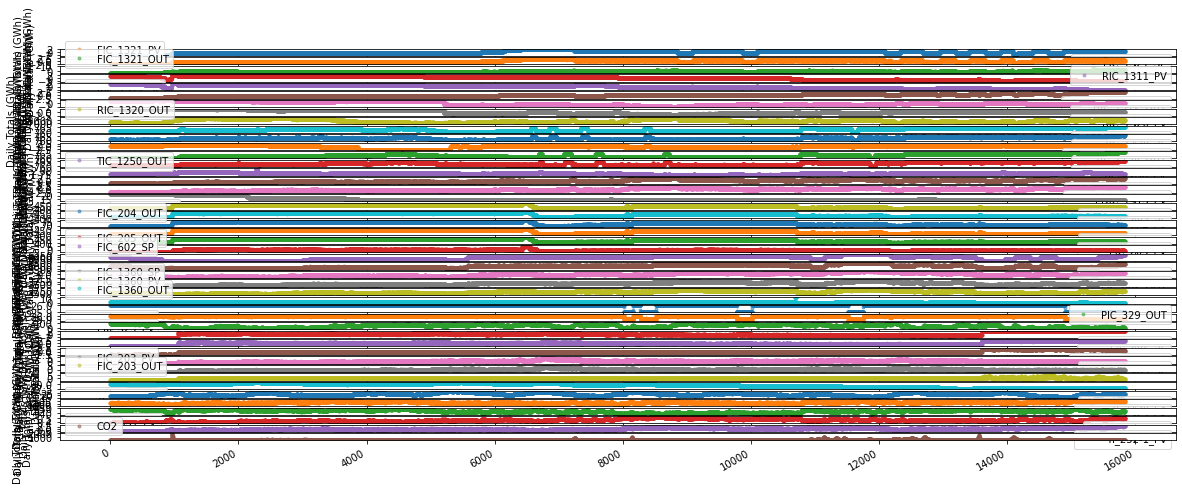

In [69]:
# cols_plot = ['Consumption', 'Solar', 'Wind']

cols_plot = df.columns #['-1-', '-2-', 'out']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

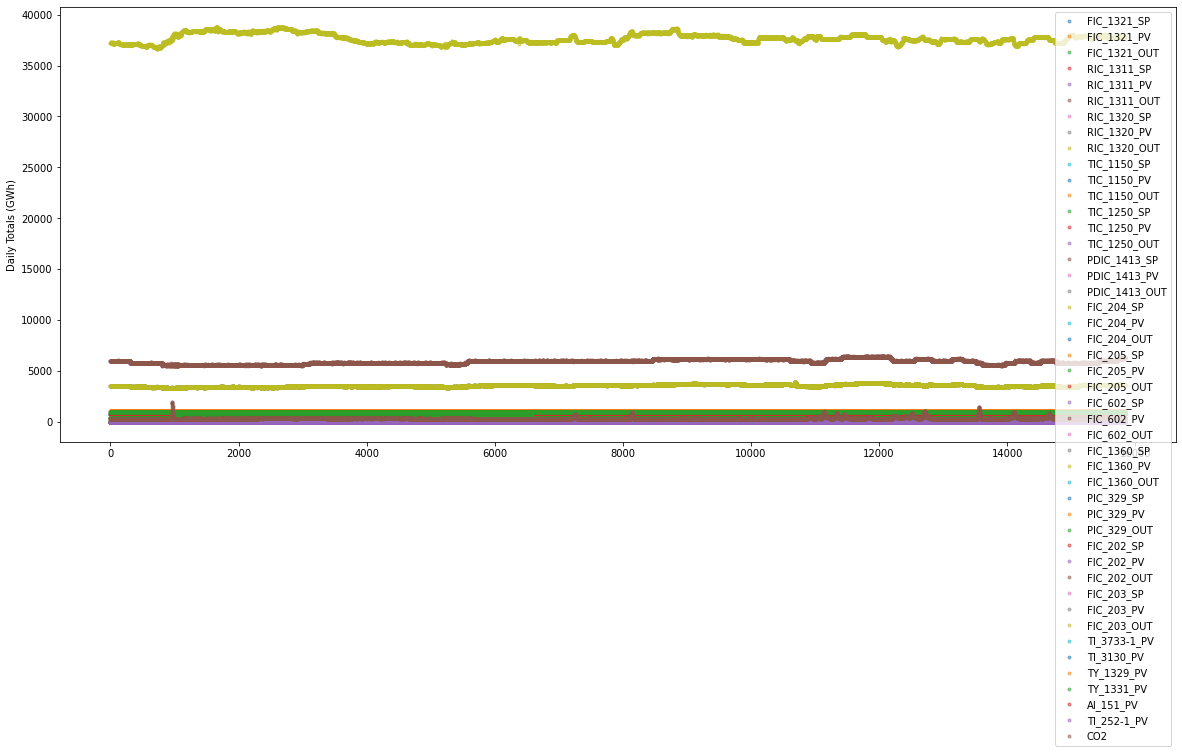

In [70]:
axes = time_series_df.plot(marker='.', alpha=0.5, linestyle='None')
plt.ylabel('Daily Totals (GWh)');

## Can we predict each day's CO2 Production from its past?

### We train on the years 2006 - 2016 and validate on 2017

In [71]:
# CO2_Production = time_series_df['Consumption'].to_numpy()
CO2_Production = time_series_df[df.columns[46]].to_numpy()
print(df.columns[46])
CO2_Production.shape

CO2


(15840,)

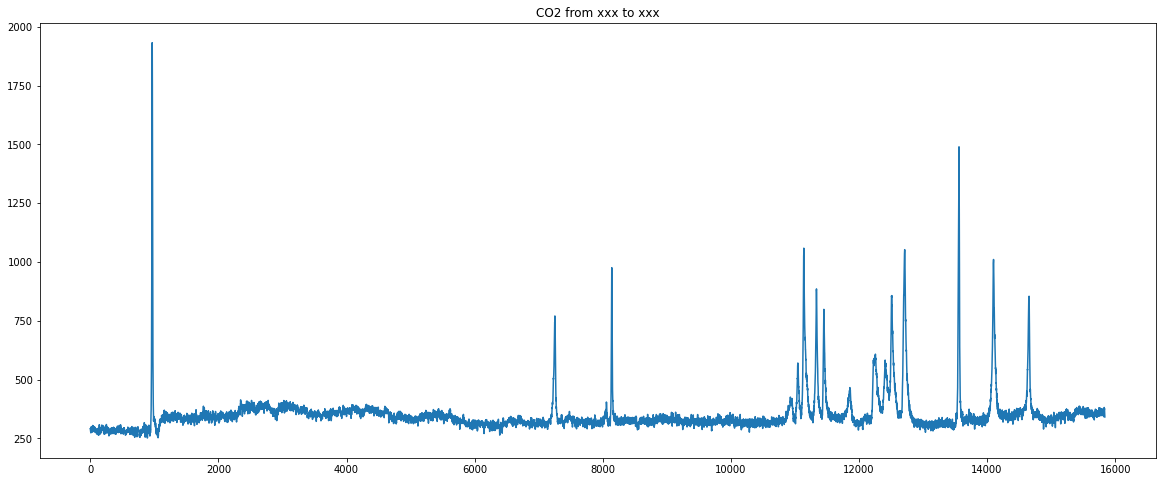

In [72]:
plt.title('CO2 from xxx to xxx')
plt.plot(CO2_Production);

## Statistical Methods directly geared towards forecasting

_Statistical Methods are often favorable: https://twitter.com/togelius/status/1173272424177119233_

* https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b#targetText=Time%20series%20forecasting%20is%20the,forecasting%20retail%20sales%20time%20series.
* https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* https://research.fb.com/prophet-forecasting-at-scale/

https://www.statsmodels.org
* https://www.statsmodels.org/stable/examples/index.html#stats
* https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html
* https://www.statsmodels.org/stable/tsa.html



In [73]:
# import statsmodels.api as sm

# decomposition = sm.tsa.seasonal_decompose(time_series_df['out'], model='additive')
# decomposition.plot();

In [74]:
# derived from here: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

### How much of the past would we like for each individual prediction?

In [75]:
#@title Prediction from n past days

# https://colab.research.google.com/notebooks/forms.ipynb

n_steps_in = 30 #@param {type:"slider", min:1, max:100, step:1}
n_steps_out = 1

In [76]:
X, Y = split_sequence(CO2_Production, n_steps_in, n_steps_out)
X.shape, Y.shape

((15810, 30), (15810, 1))

In [77]:
X[0], Y[0]

(array([291.2526   , 291.6560274, 288.4671458, 282.8678869, 283.0578785,
        279.0603276, 279.2705556, 282.6337459, 285.2210952, 273.1407455,
        278.0805008, 287.7617428, 296.3162455, 295.9223665, 295.2620416,
        297.8849531, 295.0983466, 298.384669 , 297.9587182, 293.3838301,
        292.6615604, 289.2617869, 290.5853175, 297.4002153, 295.6618972,
        293.9291484, 290.7590182, 292.4253212, 280.0550694, 276.291115 ]),
 array([276.1848923]))

In [78]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(15810, 30, 1)

In [79]:
# we do a special test / train split, 
# we see how well we can predict 2017 as test/validation 

X_train = X[-5840:]
Y_train = Y[-5840:]

X_test = X[:10000]
Y_test = Y[:10000]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5840, 30, 1), (5840, 1), (10000, 30, 1), (10000, 1))

## Baslines

### R2 Metric: MSE and MAE are not speaking

* R^2 score, the closer to 1 the better
* loosely speaking: how much better is this than predicting the constant mean
* 0 would mean just as good
* 1 is perfect
* neg. would mean even worse
* it can become arbitrarily worse

https://en.wikipedia.org/wiki/Coefficient_of_determination


### Rolling mean baseline

In [80]:
def rolling_mean_baseline(history):
  return np.mean(history, axis=1)

In [81]:
Y_pred_baseline_rolling = rolling_mean_baseline(X)
Y_pred_baseline_rolling.shape

(15810, 1)

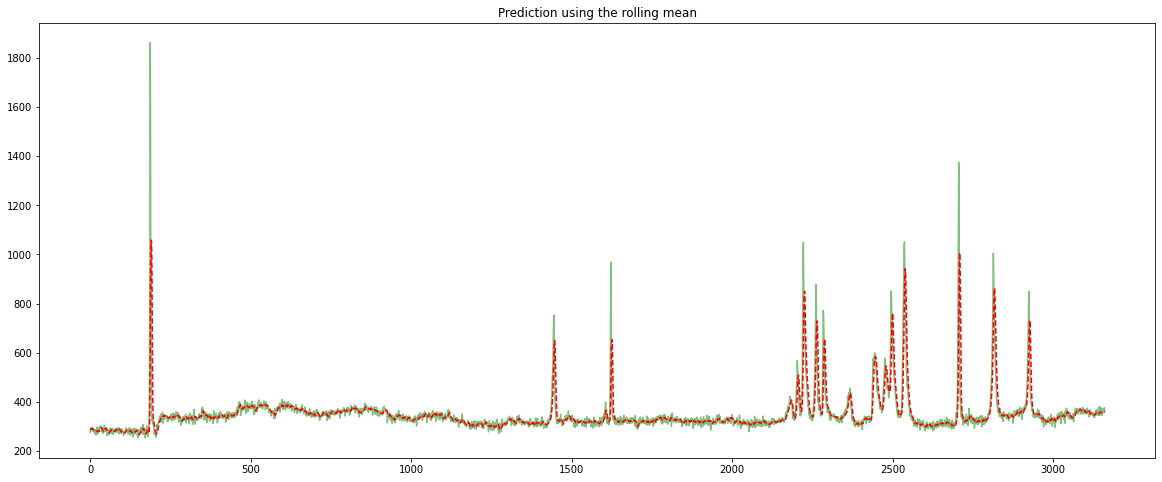

In [83]:
# this gets really crowded, using a stride, makes it more readable
stride = 5


plt.plot(CO2_Production[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_rolling[::stride], color='r', ls='dashed')

plt.title('Prediction using the rolling mean');


In [84]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred_baseline_rolling)

0.5289391566280859

### Baseline: Previous Value

In [85]:
def previous_value_baseline(history):
  return history[:, -1]

In [86]:
Y_pred_baseline_previous_value = previous_value_baseline(X)
Y_pred_baseline_previous_value.shape

(15810, 1)

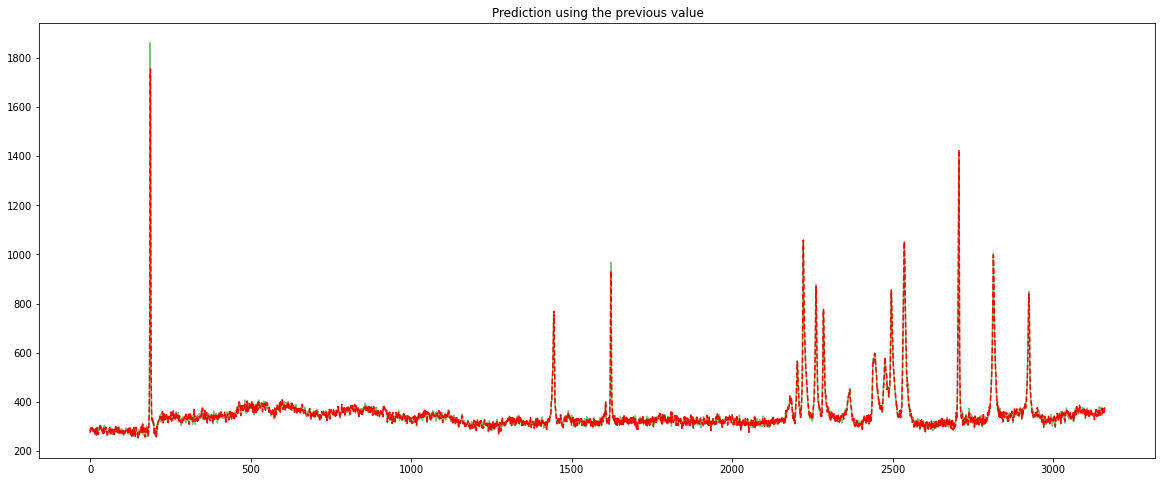

In [88]:
# this gets really crowded, using a stride, makes it more readable
stride = 5


plt.plot(CO2_Production[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_previous_value[::stride], color='r', ls='dashed')
plt.title('Prediction using the previous value');

### This looks good at first sight, but wait for the R2 score

It is (obviously) always off by one

In [89]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred_baseline_previous_value)

0.9875445505827974

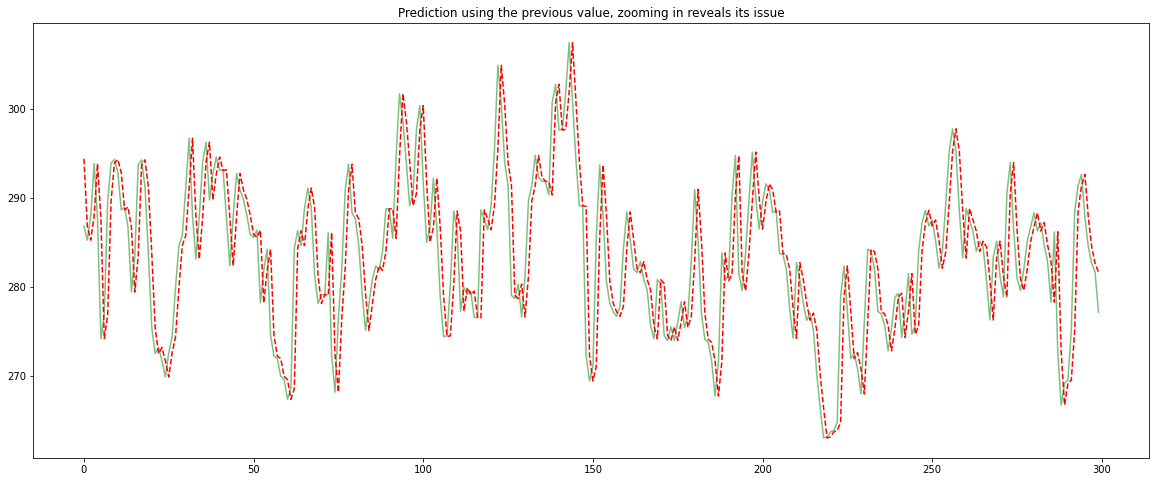

In [91]:
# this gets really crowded, using a stride, makes it more readable
stride = 1
# too crwoded, zoom in
window_start = 300
window_end = 600

plt.plot(CO2_Production[n_steps_in+window_start:n_steps_in+window_end:stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_previous_value[window_start:window_end:stride], color='r', ls='dashed')

plt.title('Prediction using the previous value, zooming in reveals its issue');

## Prediction using RNNs and TensorFlow

### Can we beat an r2 score around .20?

In [92]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [93]:
import tensorflow as tf
print(tf.__version__)

2.4.1


### Just for the reference, what GPU are we running on?

In [94]:
# What kind of GPU are we running on
!nvidia-smi

Sun Apr 25 20:51:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [95]:
# adapted from https://stackoverflow.com/a/42351397/1756489 and ported to TF 2
# https://keras.io/metrics/#custom-metrics

# only works on tensors while training, use sklearn version when using on numpy arrays

def r2_metric(y_true, y_pred):
  total_error = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
  unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
  R_squared = tf.subtract(1.0, tf.divide(unexplained_error, total_error))
  
  return R_squared

### Training our model

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model

model = Sequential()

# two layer model, known to work well
# model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu'))

# trains faster, but also works
# model.add(GRU(256, activation='relu', input_shape=(n_steps_in, n_features)))

# one layer SimpleRNN seems to be enough for this data set
model.add(SimpleRNN(256, activation='relu', input_shape=(n_steps_in, n_features)))

# horrible results
# model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(LSTM(64, activation='relu'))

# optional regularization
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# combines final outputs from RNN into continous output
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse', metrics=[r2_metric])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               66048     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [97]:
%%time

batch_size = 32
epochs=25

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    verbose=1)

Epoch 1/25
183/183 [==============================] - 9s 30ms/step - loss: 13750.7755 - r2_metric: 0.1025 - val_loss: 211.0861 - val_r2_metric: -0.1567
Epoch 2/25
183/183 [==============================] - 5s 27ms/step - loss: 267.6741 - r2_metric: 0.9761 - val_loss: 194.7935 - val_r2_metric: -0.2666
Epoch 3/25
183/183 [==============================] - 5s 27ms/step - loss: 226.6961 - r2_metric: 0.9734 - val_loss: 168.5821 - val_r2_metric: -0.0465
Epoch 4/25
183/183 [==============================] - 5s 28ms/step - loss: 194.7526 - r2_metric: 0.9738 - val_loss: 155.4485 - val_r2_metric: 0.0430
Epoch 5/25
183/183 [==============================] - 5s 27ms/step - loss: 227.5797 - r2_metric: 0.9770 - val_loss: 146.6919 - val_r2_metric: 0.0969
Epoch 6/25
183/183 [==============================] - 5s 27ms/step - loss: 191.4683 - r2_metric: 0.9772 - val_loss: 133.5170 - val_r2_metric: 0.1487
Epoch 7/25
183/183 [==============================] - 5s 27ms/step - loss: 151.7855 - r2_metric: 0.98

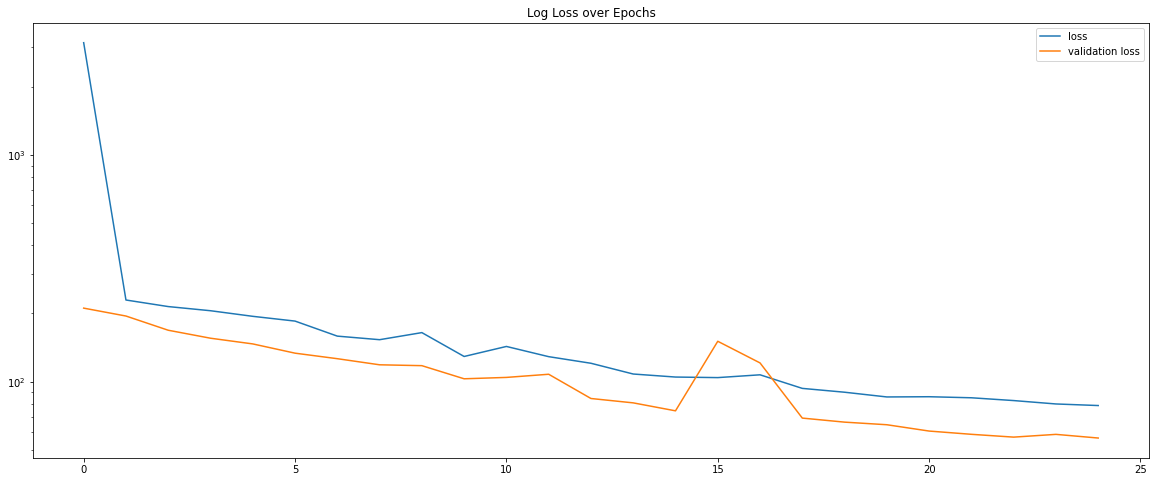

In [98]:
plt.yscale('log')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Log Loss over Epochs')

plt.legend(['loss', 'validation loss']);

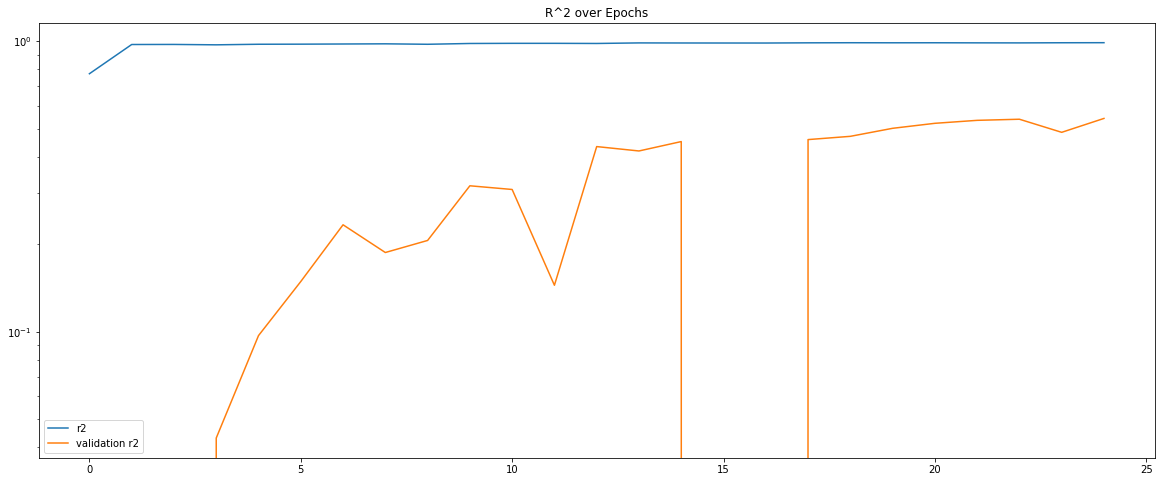

In [99]:
plt.yscale('log')
plt.plot(history.history['r2_metric'])
plt.plot(history.history['val_r2_metric'])
plt.title('R^2 over Epochs')

plt.legend(['r2', 'validation r2']);

In [100]:
model.evaluate(X, Y, batch_size=batch_size, verbose=0)

[62.23799514770508, 0.5119732022285461]

### R2 for all data

In [101]:
from sklearn.metrics import r2_score

Y_pred = model.predict(X)
r2_score(Y, Y_pred)

0.9921225553945427

### R2 for training data

In [102]:
Y_train_pred = model.predict(X_train)
r2_score(Y_train, Y_train_pred)

0.9946962648849298

### R2 for validation data

In [103]:
Y_test_pred = model.predict(X_test)
r2_score(Y_test, Y_test_pred)

0.9858112431725232

## Let's plot predicted and true over each other

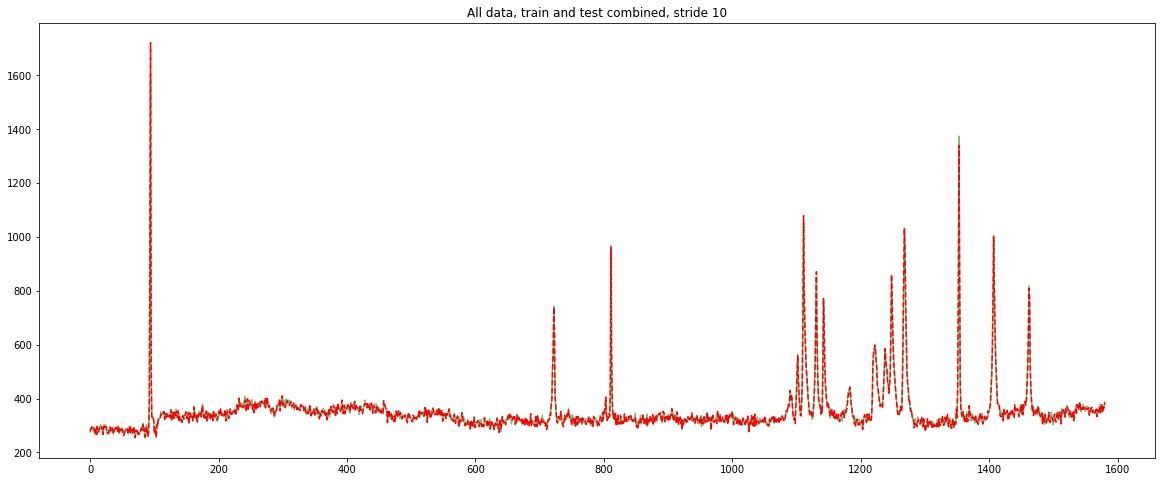

In [104]:
# this gets really crowded, using a stride, makes it more readable
stride = 10

# for the first 90 days we have no prediction, so get rid of them
plt.plot(CO2_Production[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred[::stride], color='r', ls='dashed')

plt.title('All data, train and test combined, stride 10');


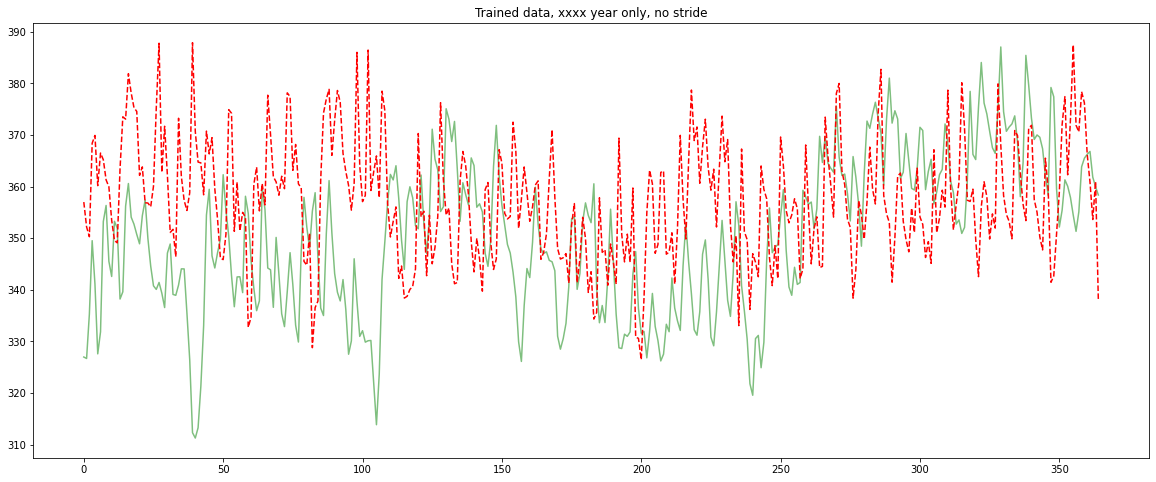

In [105]:
stride = 1


plt.plot(CO2_Production[-2 * 365:-365:stride], alpha=0.5, color='g')
plt.plot(Y_train_pred[-365::stride], color='r', ls='dashed')

plt.title('Trained data, xxxx year only, no stride');


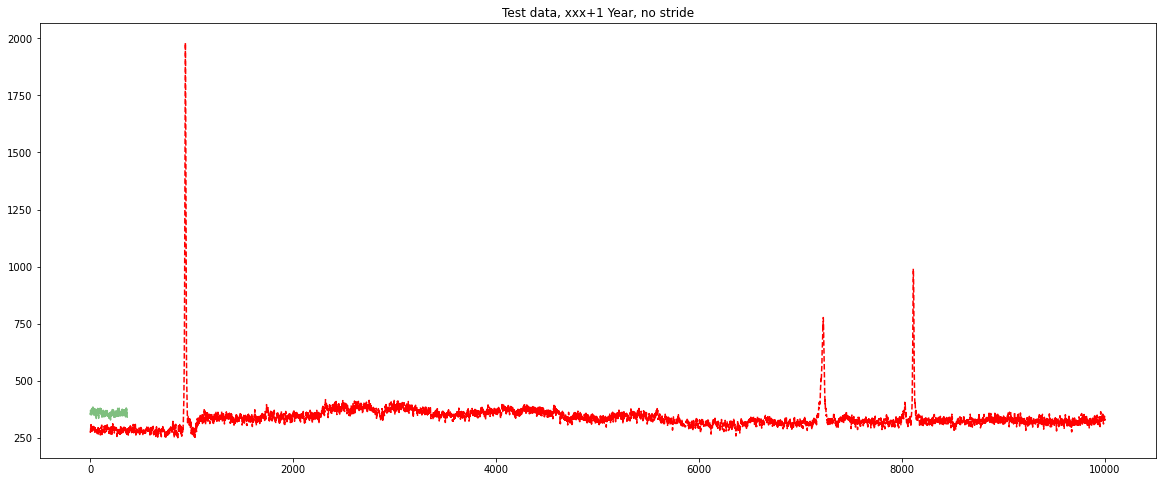

In [106]:
stride = 1


plt.plot(CO2_Production[-365::stride], alpha=0.5, color='g')
plt.plot(Y_test_pred[::stride], color='r', ls='dashed')

plt.title('Test data, xxx+1 Year, no stride');


## Observation / Wrap-Up

### overall a pretty good result
* r2 score is pretty promising
* defintely improved over baseline
* no domain knowledge necessary

### no dramatic difference between training and test data
* neither in metrices
* nor in visual inspection

### peaks and valleys are underestimated very often
* but often the most interesting part
* this seems to be a common problem in time series prediction
* it gets better we train the model for longer
* also when we increase its capacity
* on the other hand this might counter regularization


## Next Steps
  
### make use of seasonal decomposition
* predict each of the components
  * trend should be pretty easy
  * residual shows clear spices on national holidays
  * remove them
  * the results might be noise only
  * but maybe it is not, train a model on it to check
  
### have a more powerful statistical baseline
* Use more powerful statistical models
  * https://www.statsmodels.org/stable/tsa.html
  * http://www.statsmodels.org/dev/tsa.html
  * http://www.statsmodels.org/dev/vector_ar.html
* MSBVAR (Markov-Switching, Bayesian, Vector Autoregression Models) might beat our model, but
  * needs a lot of modelling 
  * does not seem readily available in the Python world (in R it would be)
  
